In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score

In [6]:
# download the dataset from Kaggle
!kaggle datasets download -d oddrationale/mnist-in-csv -p ../Data

Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
 33% 5.00M/15.2M [00:00<00:00, 32.8MB/s]
100% 15.2M/15.2M [00:00<00:00, 78.2MB/s]


In [7]:
# unzip the dataset
!unzip ../Data/mnist-in-csv.zip -d ../Data

Archive:  ../Data/mnist-in-csv.zip
  inflating: ../Data/mnist_test.csv  
  inflating: ../Data/mnist_train.csv  


In [9]:
train_data = pd.read_csv('../Data/mnist_train.csv')
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_data = pd.read_csv('../Data/mnist_test.csv')
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


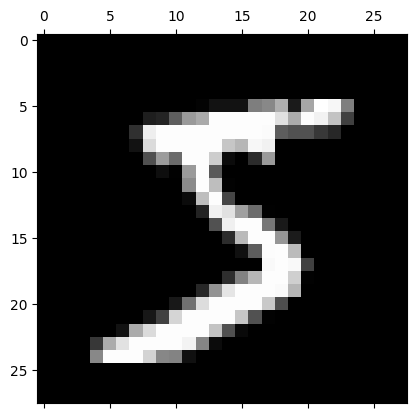

In [17]:
# plot a picture based on some row in `train_data`
sample = train_data.iloc[0, 1:].values.reshape(28, 28)
# sample
fig, ax = plt.subplots()
ax.matshow(sample, cmap='gray')

In [18]:
# standardize features
std_scaler = StandardScaler()

y_train = train_data['label']
X_train = train_data.drop(columns = ['label'])

train_data_scaled = std_scaler.fit_transform(X_train)

train_data_scaled_df = pd.DataFrame(train_data_scaled, columns = X_train.columns)
train_data_scaled_df['label'] = y_train.values
train_data = train_data_scaled_df.copy()



y_test = test_data['label']
X_test = test_data.drop(columns = ['label'])

test_data_scaled = std_scaler.transform(X_test)

test_data_scaled_df = pd.DataFrame(test_data_scaled, columns = X_test.columns)
test_data_scaled_df['label'] = y_test.values
test_data = test_data_scaled_df.copy()

In [19]:
# splitting the dataset
X_train = train_data.drop(columns = ['label'])
X_test = test_data.drop(columns = ['label'])
y_train = train_data['label']
y_test = test_data['label']

In [20]:
# training the model
model = MLPClassifier(hidden_layer_sizes=(100, 50),
                      activation='relu',
                      alpha=0.0001,
                      tol=1e-4,
                      early_stopping=True,
                      max_iter=300)
model.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=300)

In [21]:
# predicting on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:
# model evaluation
score_1 = f1_score(y_train, y_train_pred, average='weighted')
print(f"f1 score on Training Data: {score_1}")

score_2 = f1_score(y_test, y_test_pred, average='weighted')
print(f"f1 score on Test Data: {score_2}")

f1 score on Training Data: 0.9977166973630728
f1 score on Test Data: 0.9742922082060776
